# Student Performance Dataset

This is a notebook for the Final Course Project with the topic __Exploratory Data Analysis for Machine Learning__.

In this notebook the open dataset _Student Performance Data Set_ from the _UCI Machine Learning Repository_ was used: (https://archive.ics.uci.edu/ml/datasets/student%2Bperformance)

__Reference__: P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

Following sections will be answered with code examples:
1. Brief description of the data set and a summary of its attributes
2. Initial plan for data exploration
3. Actions taken for data cleaning and feature engineering
4. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis insightfully and actionable
5. Formulating at least 3 hypothesis about this data
6. Conducting a formal significance test for one of the hypotheses and discuss the results
7. Suggestions for next steps in analyzing this data
8. A paragraph that summarizes the quality of this data set and a request for additional data if needed



## 1. Brief desription of the data set and a summary of its attributes

The _Student Performance Dataset_ includes data from achievements of secondary education students participating in courses of two different schools in Portugal. There are data from math courses and from Portuguese courses. For this assigment only the data for the math courses will be used.

The structure of the data, which were provided as .csv from the _UCI Machine Learning Repository_ are as follows:

In the documentation of the dataset the dataset is described as follows:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. __school__ - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. __sex__ - student's sex (binary: "F" - female or "M" - male)
3. __age__ - student's age (numeric: from 15 to 22)
4. __address__ - student's home address type (binary: "U" - urban or "R" - rural)
5. __famsize__ - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. __Pstatus__ - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. __Medu__ - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. __Fedu__ - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. __Mjob__ - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. __Fjob__ - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. __reason__ - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. __guardian__ - student's guardian (nominal: "mother", "father" or "other")
13. __traveltime__ - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. __studytime__ - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. __failures__ - number of past class failures (numeric: n if 1<=n<3, else 4)
16. __schoolsup__ - extra educational support (binary: yes or no)
17. __famsup__ - family educational support (binary: yes or no)
18. __paid__ - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. __activities__ - extra-curricular activities (binary: yes or no)
20. __nursery__ - attended nursery school (binary: yes or no)
21. __higher__ - wants to take higher education (binary: yes or no)
22. __internet__ - Internet access at home (binary: yes or no)
23. __romantic__ - with a romantic relationship (binary: yes or no)
24. __famrel__ - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. __freetime__ - free time after school (numeric: from 1 - very low to 5 - very high)
26. __goout__ - going out with friends (numeric: from 1 - very low to 5 - very high)
27. __Dalc__ workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. __Walc__ - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. __health__ - current health status (numeric: from 1 - very bad to 5 - very good)
30. __absences__ - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject Math:
31. __G1__ - first period grade (numeric: from 0 to 20)
31. __G2__ - second period grade (numeric: from 0 to 20)
32. __G3__ final grade (numeric: from 0 to 20, output target)

## 2. Initial Plan for data exploration

My steps for data exploration include:
0. keeping place for all packages needed in the notebook
1. read in the data and print the first 5 rows
2. find out how many rows and columns are in the dataset
3. find out which columns have numeric variables and which not
4. extract the columns with numeric values and do some maths
5. group the data by some attributes and do some vizualisations

### 0. keeping place for all packages needed in the notebook

In [44]:
# importing relevant packages for the notebook
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from scipy.stats import binom

### 1. read in the data and print the first 5 rows

In [26]:
# read the data in, do a copy for later and display the first 5 rows - transposed displayed so, that all column names 
# can be seen. The engine='python' command was recommended by jupyter-python3 for parsing without warning calling, otherwise
# "\;" must be written as RegEx statement due to version changes

path = "student-mat.csv"

df = pd.read_csv(path, sep="\;", engine='python')
data = df.copy()

df.head().T

,0,1,2,3,4
school,"""GP""","""GP""","""GP""","""GP""","""GP"""
sex,"""F""","""F""","""F""","""F""","""F"""
age,18,17,15,15,16
address,"""U""","""U""","""U""","""U""","""U"""
famsize,"""GT3""","""GT3""","""LE3""","""GT3""","""GT3"""
Pstatus,"""A""","""T""","""T""","""T""","""T"""
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,"""at_home""","""at_home""","""at_home""","""health""","""other"""
Fjob,"""teacher""","""other""","""other""","""services""","""other"""


### 2. find out how many rows and columns are in the dataset

In [27]:
# printing with the shape-attribute the number of rows and columns 
 
df.shape

(395, 33)

There are 395 _observations_ (rows) and 33 _attributes_ (columns). The 33. column (G3, final grade) was declared as _target_, so there are for now 32 x 395 (12 640) different _feature_ values (sex, age, mother's and father's education,...), which can be used to train and validate a model to predict a special grade (_target_) in student courses.

### 3. find out which columns have numeric variables and which not

In [28]:
# use the info-function to display all columns with datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

### 4. extract the columns with numeric values and do some maths

In [29]:
# save all numeric values columns into a list

numeric_columns = df.dtypes[df.dtypes != np.object].index.to_list()

numeric_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G3']

In [30]:
# build a smaller df (df_num) with all columns with numeric values

df_num = df[numeric_columns]

df_num.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [31]:
# do some maths with these numeric values

# print some stats with the describe-funtion for age, studytyime, and G3

df_num[['age', 'studytime', 'G3']].round().describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


In the mean the students are about 16 - 17 years old, the youngest is 15 years old and the oldest 22 years. Furher in the mean they learn 2 - 5 hours (see data description for the meaning of "2" for studytime), and have something above 10 from 20 points in the final grade. There is also at least one student who has 0 points in the final grade. So quite average students... :-)

### 5. group the data by some attributes and/or do some vizualisations

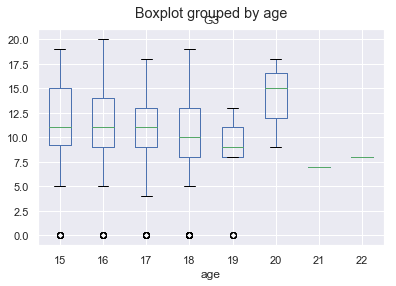

In [32]:
# create a barplot grouped by age and the grades (G)

df.boxplot(column='G3', by='age');

So it seams that students with the age 20 has the most points for final grade. For students with age 21 and age 22, there seems to very few data in the dataset. Further there seem to be outliers concerning the students aged 15 until 19 years. Now, let's investigate the number of students in each age class.

In [33]:
x= df_num.groupby(['age'])['age'].count()
x

age
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

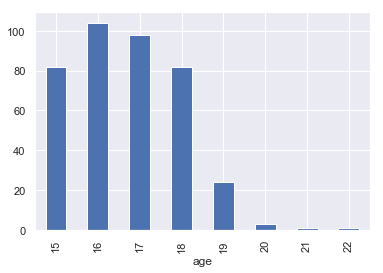

In [34]:
x.plot(kind='bar');

And how many male and female students are there?

In [35]:
# counting male and female students
df.groupby('sex')['sex'].count()

sex
"F"    208
"M"    187
Name: sex, dtype: int64

In [36]:
# calculating the percentage of female students
fem_perc = round((208*100)/395,1)
print('{}%'.format(fem_perc))

52.7%


There are a few more female students as male students, exactly 52.7% of all students.

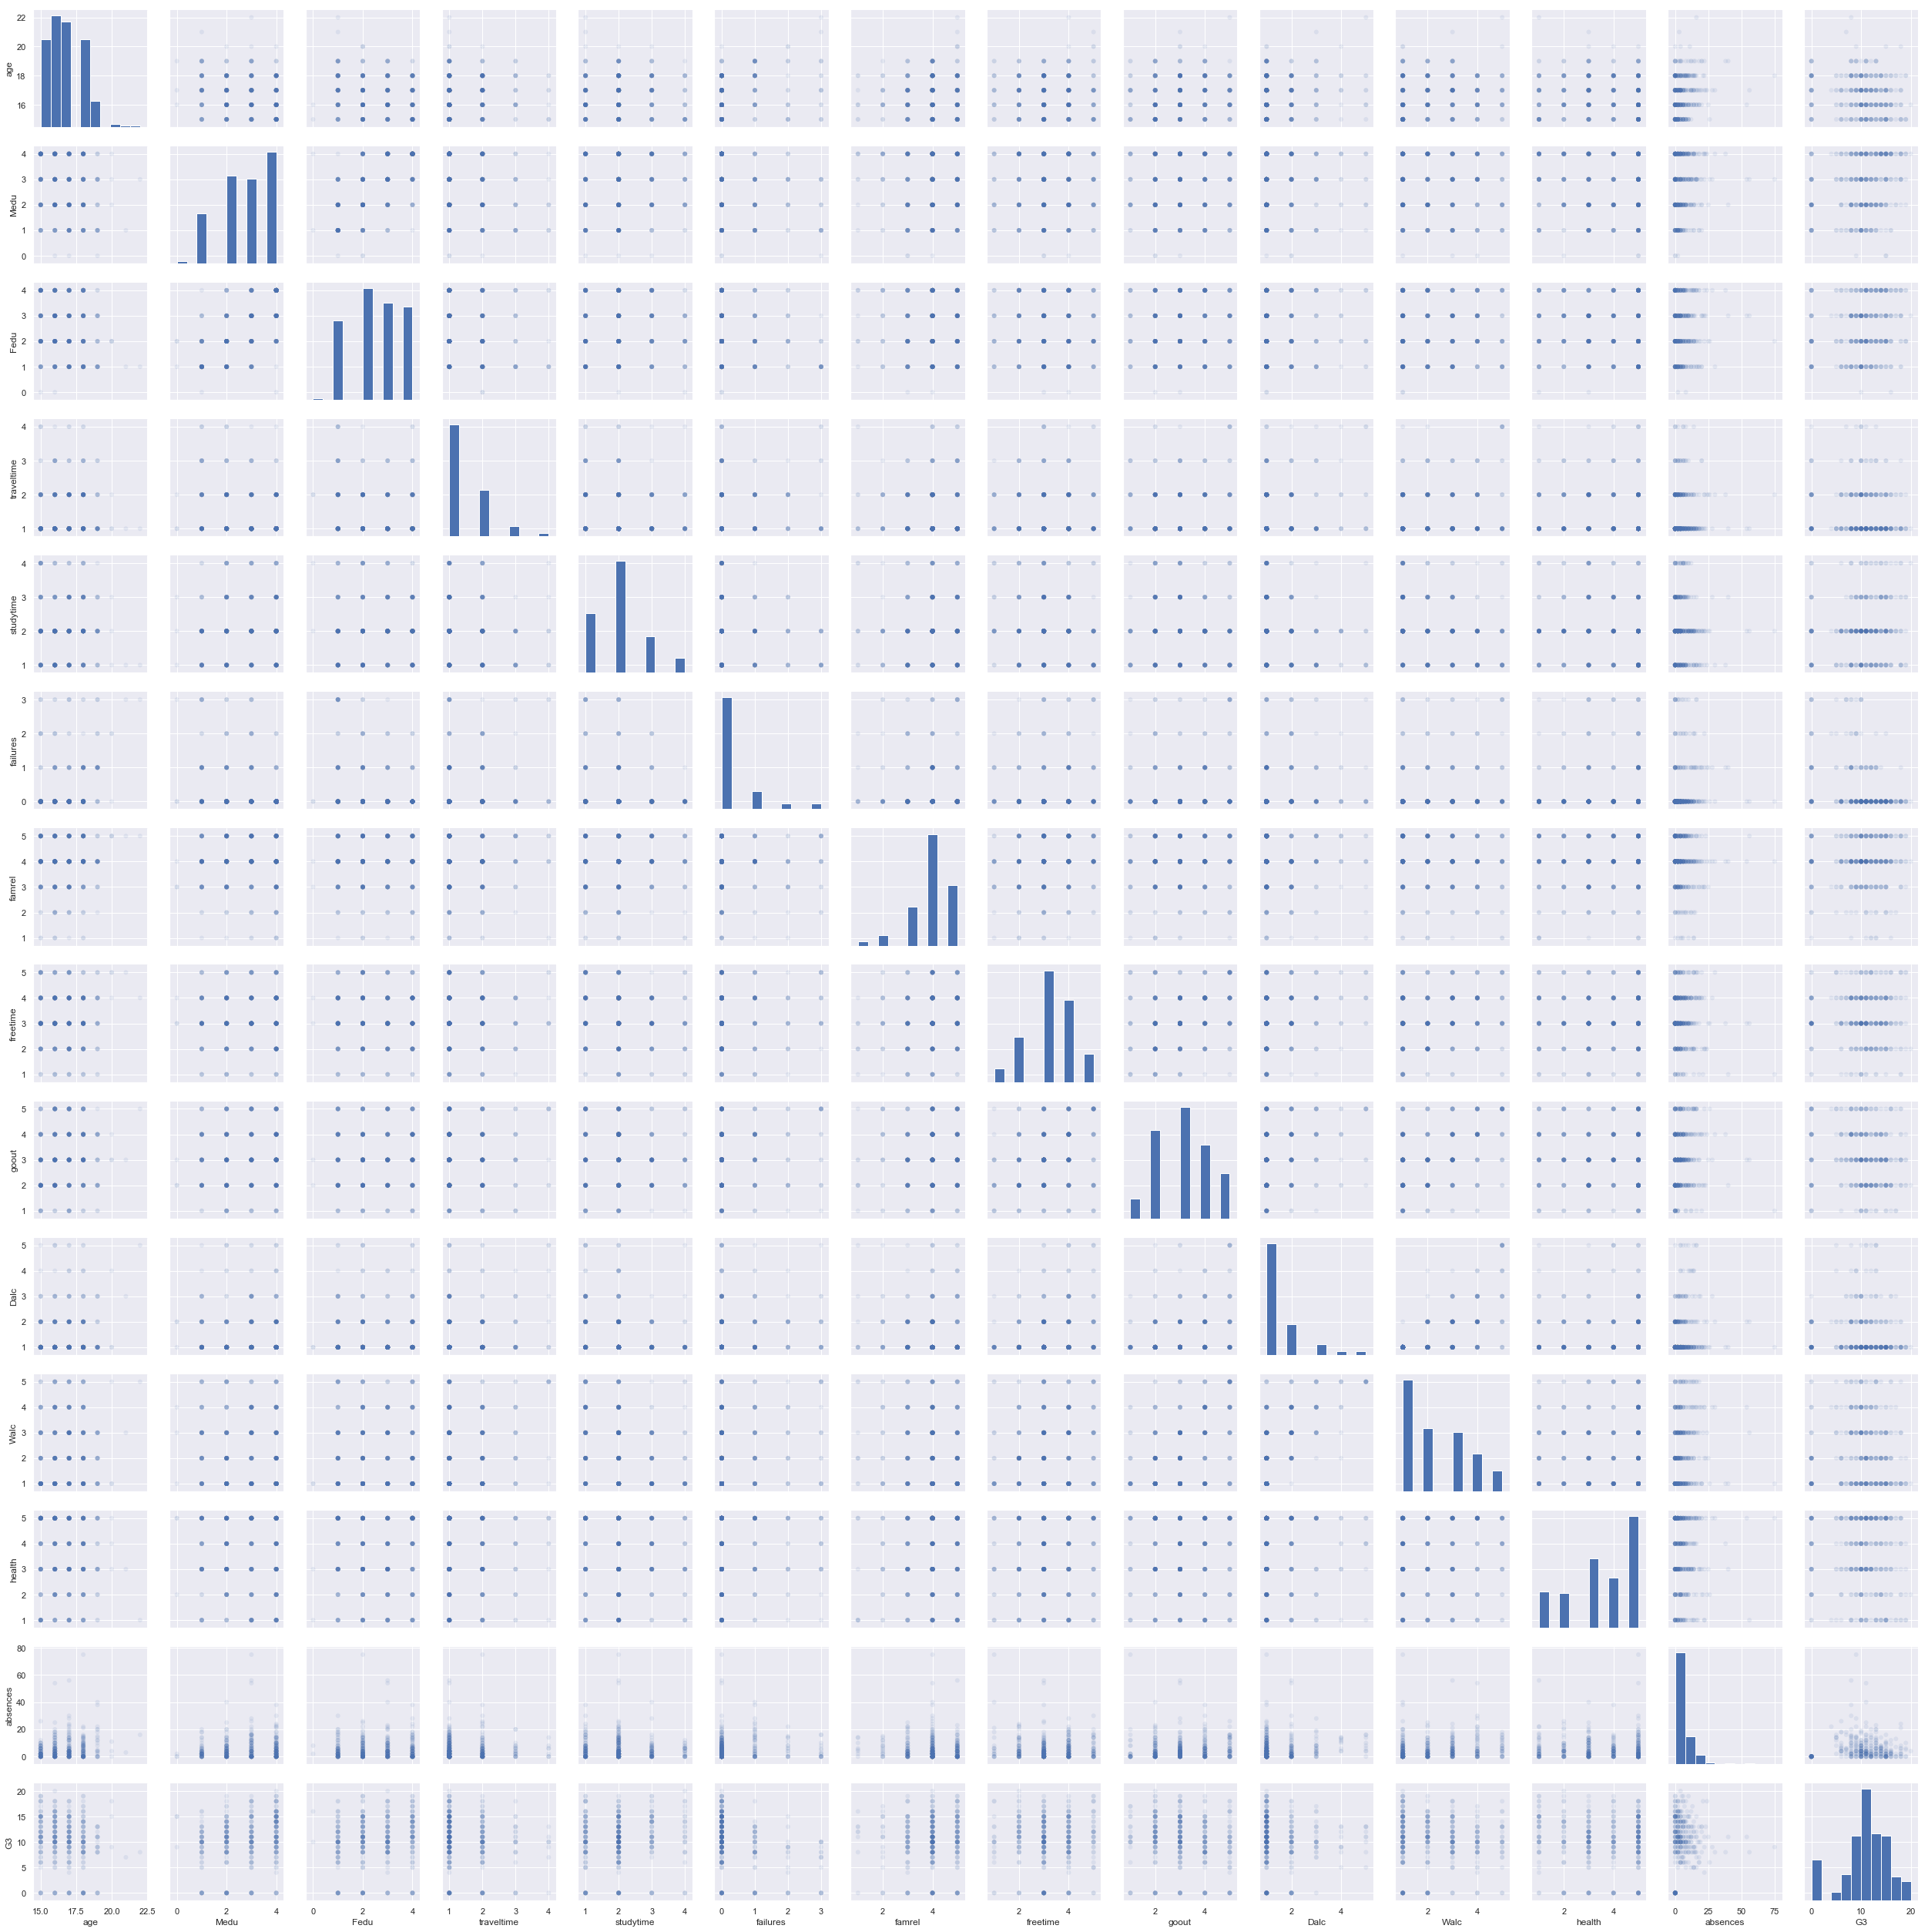

In [37]:
# doing a pairplot with the numeric values
sns.pairplot(df_num, plot_kws=dict(alpha=.1, edgecolor='none'));

As can be seen in the vizualisation there are very few students aged older than 19. So let's do some feature engineering by summarizing groups and finally get all non-numric values into numeric ones, so that we can fit a model.

## 3. actions taken for data cleaning and feature engineering

Since some age groups have very few students we will summarize some of them. Further since there are many non-numeric values in the data, we will transform them by one-hot-encoding.

In [38]:
# summarize some age-groups - Part 1
age_groups = df.age.value_counts()
age_groups

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [39]:
# summarize some age-groups - Part 2
old = list(age_groups[age_groups <= 24].index)
old

[19, 20, 22, 21]

In [40]:
# summarize some age_groups - Part 3
df['age'] = df['age'].replace(old, '19+')
df['age'].value_counts()

16     104
17      98
18      82
15      82
19+     29
Name: age, dtype: int64

Now there are from 8 age-groups 5 left. The new age-groups has the name '19+' and summarizes all students between 19 - 22 years old.

In [41]:
### transform non-numeric data in numeric data by one-code-encoding
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
school,"""GP""","""GP""","""GP""","""GP""","""GP"""
sex,"""F""","""F""","""F""","""F""","""F"""
age,18,17,15,15,16
address,"""U""","""U""","""U""","""U""","""U"""
famsize,"""GT3""","""GT3""","""LE3""","""GT3""","""GT3"""
Pstatus,"""A""","""T""","""T""","""T""","""T"""
Mjob,"""at_home""","""at_home""","""at_home""","""health""","""other"""
Fjob,"""teacher""","""other""","""other""","""services""","""other"""
reason,"""course""","""course""","""other""","""home""","""home"""
guardian,"""mother""","""father""","""mother""","""mother""","""father"""


In [42]:
#Do the one hot encolding
df_one = pd.get_dummies(df, columns = one_hot_encode_cols, drop_first=True)
df_one.describe().T

,count,mean,std,min,25%,50%,75%,max
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0
Walc,395.0,2.291139,1.287897,1.0,1.0,2.0,3.0,5.0


In [43]:
df_one.shape

(395, 75)

Now we have from the original data (df) two dataframes, both with numeric values: df_one after one-hot encoding, and df_num before the rudimentary numeric data extracted. In overall, we have 395 x 73 = 28 835 feature values, which whom we can fit a model.

## 4. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis insightfully and actionable

As seen there was a dataset with data which need to be transformed that they can be used in a model. These transformings included for now summarization of some age-groups and one-hot encoding. The target values mean lays in the middle, so all students can be seen together as average. There are also some outliers (0 points for grade) in the dataset. The cleaning of these outliers just by the drop-function is an possible way to handle them, even so then there are a few less observations in the whole dataset. After cleaning the outliers the target values mean would probably rise, but for now it is good to show that there are also very weak students because often they need support.

## 5. Formulating at least 3 hypothesis about this data

### First testing

__H0__: When I go into 100 individually other math classes in Portugal, I will not find the same number of students or even more as in this combined class

__H1__: When I go into 100 individually other math classes in Portugal, I will find exactly the same number or even more of students as in this combined class

### Second testing

__HO__: Alcohol consum does lead to fewer grade points in the end

__H1__: Alcohol consum does not lead to fewer grade points in the end

### Third testing

__H0__: Students who want to visit later on the university have better grade points than others

__H1__: Students who want to visit later on the university do not gave better grade points others


## 6. Conducting a formal significance test for one of the hypotheses and discuss the results

We will test the _first testing_:

H0: When I go into 100 individually other math classes in Portugal, I will not find the same number of students as in this class

H1: When I go into 100 individually other math classes in Portugal, I will find exactly the same number of students as in this class

So what is the probability to meet the exact same students number of 395 students in another two combined math class in Portugal.

In [48]:
#the probability of meeting 395 or more students in other 100 classes
prob = 1 - binom.cdf(394, 100, 0.5)

print(str(round(prob*100, 1))+"%")

0.0%


The probability lays at 0.0 % so H0 is proven. I would need to visit more, maybe much more classes.

## 7. Suggestions for next steps in analyzing this data

Possible steps:
- Comparing female and male students for grades
- Comparing students which come from "educated" homes, so where parents have a university degree with the others
- Comparing students where at least one parent is at home and not working with others
- Comparing students which want to got to university with others
- and so on... 




## 8. A paragraph that summarizes the quality of this data set and a request for additional data if needed

The quality of the data is in overall very good, eg. no missing values. There could be more students observations to build a model. 

__Notebook created by Verena Dornauer for coursera IBM Machine Learning Professional Certificate__